# Héctor Delgado Díaz and Samantha Gilbert

## Exoplanets Spring 2020

## HW 1a

### Problem 1

In this problem, we wish to develop a Kepler's EQ solver. We outlined the method we will use in class, in which we will optimize over Kepler's equation using Newton's method.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

In [2]:
# We first define a function that gives the solution to 
# the two-body problem in the form of Kepler's equation. 
# Since M = E - e * sin(E), we expect this function to equal 
# approximately 0 when correct. We will optimize over this 
# function using Newton's method.
#
# E = eccentric anomaly
# e = eccentricity 
# M = mean anomaly

def g(E, e, m):
    return E - e * np.sin(E) - M

In [3]:
# We now define a function that gives the partial derivative 
# of our first function g with respect to the eccentric anomaly E.
# Calculating the value of this partial derivative will help us
# to calculate E_i+1 at each subsequent iteration.

def dg_dE(E, e):
    return 1 - e * np.cos(E) 

In [4]:
# We will optimize over our function for g using Newton's method.
# In this method, we initialize the function with a starting guess 
# for the zeroth E given by:
# 
# E_0 = M + 0.85 * e * sign(sin(M)) 
# 
# where "sign" indicates a conditional function that changes the sign 
# in front of sin(M). 
# 
# We then iterate until we converge on a value for E. We accomplish
# this iteration by finding
# 
# dg/dE = 1 - e * cos(E)
# 
# and define each subsequent iteration of E relative to the last using
# the recursive relation
#
# E_i+1 = E_i - g(E, e, M)/(dg/dE)

def kepler(M, e):
    
    #Calculate initial values for E, g, and dg/dE.
    
    E_0 = M + 0.85 * e * np.sign(np.sin(M))
    
    g_0 = g(E_0, e, M) # Calculate the zeroth g given the zeroth E value
    
    dg_dE_0 = dg_dE(E_0, e) # Calculate the zeroth partial deriv. given the zeroth E value
    
    
    # Continue to interate as long as the last E value exceeds the given tolerance.
    
    while abs(-g(E_0, e, M)/dg_dE(E_0, e)) > 1E-14: # We define our tolerance for convergence to be 1e-14 based on the recommendation given in class
        
        E = E_0 - (g(E_0, e, M) / dg_dE(E_0, e)) # Calculate the next E value
        
        E_0 = E # Set the last E value as the new starting value
        
    return E_0 

/Users/samanthagilbert/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in double_scalars


Text(0,0.5,'E')

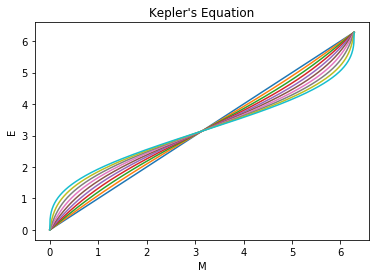

In [6]:
# Now that we have defined the necessary functions, we can test
# our solver on an array of e and M values. As given by the question,
# we will test values
# 
# 0 < e < 1
#
# and
#
# 0 < M < 2 * np.pi

e_vals = np.linspace(0, 1, 10) 

M_vals = np.linspace(0, 2 * np.pi, 1000)

'''-------------------------------------------------------------------'''

# Create the figure.

fig = plt.figure()

ax = plt.axes()

ax.set_title('Kepler\'s Equation')

'''-------------------------------------------------------------------'''

for e in e_vals:
    
    E_ans = [] # Initialize an array for storing our calculated E's.
    
    for M in M_vals:
        
        E = kepler(M, e) # Calculate E for the given M and e grids.
        
        E_ans.append(E) # Populate the array with the E's we've calculated.
        
    ax.plot(M_vals, E_ans) # Plot the M values on the x-axis, and the calculated E values on the y.
    
ax.set_xlabel('M')

ax.set_ylabel('E')